In [2]:
%pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 262.6 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.5 MB 585.1 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 711.9 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.5 MB 1.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.5 MB 1.0 MB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.5 MB 1.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.5 MB 1.4 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.5 MB 1.5 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.5 MB 1.5 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.5 MB 1.6 MB/s eta 0:00:01
   ------------------------

In [1]:
from gensim import corpora
from gensim.models import LdaModel, HdpModel
from gensim.parsing.preprocessing import STOPWORDS
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

# Sample data: List of documents
documents = [
    "Penguins are aquatic, flightless birds living mostly in the southern hemisphere.",
    "The cat (Felis catus) is a domestic species of small carnivorous mammal.",
    "A bicycle, also called a bike or cycle, is a human-powered or motor-powered, pedal-driven vehicle.",
    "The coffee plant is a bush or tree that can grow up to ten meters high, but is usually cut shorter. Coffee beans are actually the seeds of its fruit.",
    "Mount Everest is Earth's highest mountain above sea level, located in the Himalayas on the border between Nepal and the Tibet Autonomous Region of China.",
    "The Great Barrier Reef, located in the Coral Sea off the coast of Queensland, Australia, is the world's largest coral reef system and can be seen from outer space.",
    "Leonardo da Vinci was an Italian polymath of the High Renaissance who is widely considered one of the greatest painters of all time and a profoundly influential figure in world history.",
    "The Internet is a global network of interconnected computers that use the Internet protocol suite (TCP/IP) to communicate between networks and devices.",
    "Photosynthesis is a process used by plants, algae, and certain bacteria to convert light energy into chemical energy that can later be released to fuel the organisms' activities.",
    "Blockchain is a decentralized, distributed ledger technology that records the provenance of a digital asset, making it secure by design and exemplifying a distributed computing system with high Byzantine fault tolerance.",
    "The theory of relativity, developed by Albert Einstein, revolutionized the understanding of space, time, and gravity, profoundly changing the way scientists view the universe.",
    "Jazz is a music genre that originated in the African-American communities of New Orleans, United States, in the late 19th and early 20th centuries, with roots in blues and ragtime.",
    "Artificial Intelligence (AI) refers to the simulation of human intelligence in machines that are programmed to think like humans and mimic their actions, potentially exceeding human capabilities in certain tasks.",
    "Sushi, a traditional Japanese dish, involves vinegared rice accompanied by a variety of ingredients, including seafood, vegetables, and occasionally tropical fruits.",
    "The Sahara is the largest hot desert in the world, covering much of North Africa and home to a variety of ecosystems adapted to the extreme conditions.",
    "The French Revolution, a period of radical social and political upheaval in France that lasted from 1789 until 1799, significantly impacted the course of French and world history.",
    "Quantum mechanics is a fundamental theory in physics that provides a description of the physical properties of nature at the scale of atoms and subatomic particles.",
    "Sustainable development is a holistic approach that seeks to meet the needs of the present without compromising the ability of future generations to meet their own needs, emphasizing the balance between environmental sustainability, economic stability, and social equity.",
    "The human brain is the central organ of the human nervous system and controls most of the activities of the body, processing, integrating, and coordinating the information it receives from the sense organs.",
    "The Amazon Rainforest, also known as the Amazon Jungle, is a moist broadleaf tropical rainforest in the Amazon biome that covers most of the Amazon basin of South America.",
    "The history of the United States, a country in North America, is characterized by a rich and diverse cultural heritage, shaped by its indigenous peoples, European colonization",
    "The periodic table is a tabular arrangement of the chemical elements, organized by their atomic number, electron configuration, and recurring chemical properties.",
    "The solar system consists of the Sun and the astronomical objects bound to it by gravity, including the eight planets and their natural satellites, dwarf planets, asteroids, and comets.",
    "Climate change refers to long-term changes in the average temperature, precipitation, and other atmospheric conditions in Earth's climate system, leading to more frequent and severe extreme weather events.",
    "The human immune system is a complex network of cells, tissues, and organs that work together to defend the body against attacks by foreign invaders, such as bacteria, viruses, and other pathogens.",
    "The history of ancient Egypt spans the period from the early prehistoric settlements of the northern Nile valley to the Roman conquest in 30 BC, encompassing a rich and diverse culture rooted in the Nile River.",
    "The theory of evolution by natural selection, proposed by Charles Darwin, explains how species evolve over time through the process of natural selection, where organisms with favorable traits are more likely to survive and reproduce.",
    "The World Wide Web, commonly known as the Web, is an information system where documents and other web resources are identified by Uniform Resource Locators (URLs), interlinked by hypertext links, and accessible via the Internet.",
    "The human respiratory system is a series of organs responsible for taking in oxygen and expelling carbon dioxide, consisting of the nose, pharynx, larynx, trachea, bronchi, and lungs.",
    "The history of China, one of the world's oldest civilizations, spans thousands of years, with a rich and complex cultural heritage influenced by various dynasties, philosophies, and religions.",
    "The theory of general relativity, developed by Albert Einstein, describes gravity as a geometric property of space and time, predicting the motion of objects in the presence of matter and energy.",
    "The human digestive system is a group of organs working together to convert food into energy and basic nutrients to feed the entire body, consisting of the mouth, esophagus, stomach, small intestine, large intestine, rectum, and anus.",
    "The history of ancient Rome spans the period from the founding of the city of Rome in 753 BC to the fall of the Western Roman Empire in AD 476, encompassing a rich and diverse culture rooted in the Roman Republic and Roman Empire.",
    "The theory of quantum mechanics, developed in the early 20th century, describes the behavior of matter and energy at the atomic and subatomic scales, challenging the classical physics principles of determinism and causality.",
    "The human cardiovascular system is a network of blood vessels, including arteries, veins, and capillaries, that transport blood throughout the body, delivering oxygen and nutrients to the tissues and removing waste products.",
    "The history of ancient Greece spans the period from the early Bronze Age civilizations in the Aegean Sea to the Roman conquest of Greece in the 2nd century BC, encompassing a rich and diverse culture rooted in democracy, philosophy, and the arts.",
    "The theory of plate tectonics, developed in the mid-20th century, describes the large-scale motion of the Earth's lithosphere, consisting of rigid plates that move relative to each other, causing earthquakes, volcanic activity, and continental drift.",
    "The human endocrine system is a network of glands that produce and secrete hormones to regulate various bodily functions, including metabolism, growth and development, tissue function, sexual function, reproduction, sleep, and mood.",
    "The history of the Roman Empire spans the period from the founding of the Roman Republic in 509 BC to the fall of the Western Roman Empire in AD 476, encompassing a rich and diverse culture rooted in the Roman Republic and Roman Empire.",
    "The theory of special relativity, developed by Albert Einstein, describes the relationship between space and time, proposing that the laws of physics are invariant under Lorentz transformations, leading to the concept of spacetime.",
    "The human muscular system is a network of tissues that controls movement, maintains posture, and circulates blood throughout the body, consisting of skeletal, smooth, and cardiac muscles.",
    "The history of the Middle Ages, a period in European history from the 5th to the late 15th century, is characterized by feudalism, the Crusades, the Black Death, and significant cultural and technological advancements.",
    "The theory of electromagnetism, developed in the 19th century by James Clerk Maxwell, describes the relationship between electricity and magnetism, unifying the two forces into a single electromagnetic force governed by Maxwell's equations.",
    "The human skeletal system is a network of bones, cartilage, and ligaments that provides support, protection, and movement for the body, consisting of the axial skeleton (skull, vertebral column, rib cage) and the appendicular skeleton (shoulder girdle, pelvic girdle, limbs).",
    "The history of the Renaissance, a period of cultural rebirth in Europe from the 14th to the 17th century, is characterized by a revival of interest in classical antiquity, humanism, art, literature, and science.",
    "Maxwell equations describe how electric and magnetic fields are generated and altered by each other and by charges and currents. They are named after the physicist James Clerk Maxwell, who published them in 1861 and 1862.",
    "Astar is a graph traversal and path search algorithm, which is often used in computer science due to its completeness, optimality, and optimal efficiency.",
    "The human integumentary system is a network of tissues that protects the body from damage, including the skin, hair, nails, and exocrine glands, providing a barrier against infections and regulating body temperature.",
    "The history of the Industrial Revolution, a period of rapid industrialization and technological advancement in the 18th and 19th centuries, is characterized by the transition from manual labor to machine-based manufacturing, leading to significant social, economic, and cultural changes.",
    "The Pythagorean theorem describes the relationship between the sides of a right triangle, stating that the square of the hypotenuse is equal to the sum of the squares of the other two sides, a fundamental principle in Euclidean geometry.",
    "Egg benedict is a breakfast dish consisting of two halves of an English muffin topped with a poached egg, bacon or ham, and hollandaise sauce, a rich and creamy emulsion of egg yolk, butter, lemon juice, and seasonings.",
    "Gordon Ramsay is a British chef, restaurateur, television personality, and writer known for his fiery temper, culinary expertise, and multiple Michelin star-rated restaurants.",
    "Master Chef is a competitive cooking reality show where amateur chefs compete in various culinary challenges to win the title of Master Chef and a cash prize.",
    "Alvin Leung is a Canadian chef known for his innovative and unconventional approach to cooking, earning him the nickname 'Demon Chef' and multiple Michelin stars for his restaurant Bo Innovation in Hong Kong.",
    "Indonesia is a country in Southeast Asia consisting of thousands of islands, known for its diverse culture, rich history, and natural beauty, including tropical forests, beaches, volcanoes, and wildlife.",
    "Italia has a rich and diverse culinary heritage, with each region offering unique dishes and ingredients, such as pasta, pizza, risotto, olive oil, and wine, reflecting the country's history, geography, and culture.",
    "When we are going to a trip, we need to pack our luggage with clothes, toiletries, travel documents, and other essentials to ensure a comfortable and enjoyable travel experience."]

# Preprocess the documents
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()

# Tokenization and lemmatization
texts = [
    [lemmatizer.lemmatize(token) for token in tokenizer.tokenize(document.lower()) if token not in STOPWORDS]
    for document in documents
]

# Create a dictionary and corpus needed for Topic Modeling
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


[nltk_data] Downloading package omw-1.4 to C:\Users\Kevin Putra
[nltk_data]     Santoso\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Kevin Putra
[nltk_data]     Santoso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Number of topics
num_topics = 10

# Build LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Print the model perplexity
print(f"Model Perplexity: {lda_model.log_perplexity(corpus)}")
# Display the topics
print("LDA Model:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

Model Perplexity: -7.2123980942281705
LDA Model:
Topic: 0 
Words: 0.041*"roman" + 0.021*"empire" + 0.015*"rich" + 0.015*"culture" + 0.015*"diverse" + 0.014*"republic" + 0.014*"history" + 0.013*"bc" + 0.013*"period" + 0.013*"rooted"

Topic: 1 
Words: 0.015*"powered" + 0.015*"maxwell" + 0.015*"nile" + 0.013*"history" + 0.013*"diverse" + 0.012*"culture" + 0.012*"rich" + 0.012*"early" + 0.008*"driven" + 0.008*"electric"

Topic: 2 
Words: 0.019*"function" + 0.019*"including" + 0.013*"planet" + 0.011*"history" + 0.010*"distributed" + 0.010*"cultural" + 0.009*"s" + 0.009*"rich" + 0.009*"ingredient" + 0.009*"heritage"

Topic: 3 
Words: 0.018*"travel" + 0.011*"sea" + 0.009*"autonomous" + 0.009*"earth" + 0.009*"enjoyable" + 0.009*"essential" + 0.009*"going" + 0.009*"tibet" + 0.009*"mount" + 0.009*"comfortable"

Topic: 4 
Words: 0.021*"human" + 0.017*"body" + 0.015*"girdle" + 0.015*"skeleton" + 0.014*"network" + 0.014*"blood" + 0.008*"protection" + 0.008*"skeletal" + 0.008*"pelvic" + 0.008*"colum

# Latent Dirichlet Allocation

Tahapan:
- Deklarasikan algoritma LDA
- Hitung Perplexity
- Terapkan PCA (2 dimensi)
- Visualisasi dengan Bubble Plot

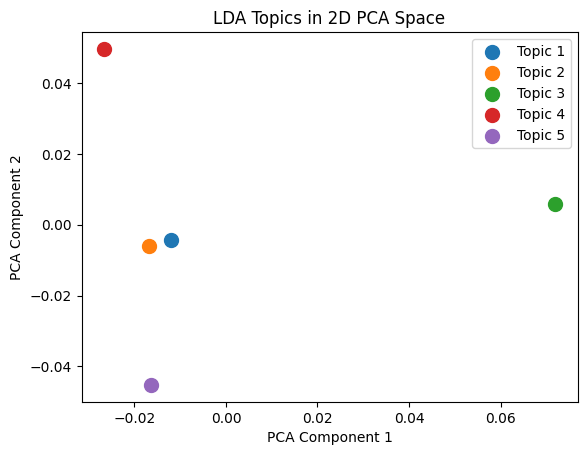

In [5]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, strip_numeric, remove_stopwords, strip_short
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Preprocess documents
CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation, strip_numeric, remove_stopwords, strip_short]
processed_docs = [preprocess_string(doc, CUSTOM_FILTERS) for doc in documents]

# Create a dictionary representation of the documents.
dictionary = Dictionary(processed_docs)

# Filter out words that occur in less than 20% of the documents, or more than 50% of the docs.
dictionary.filter_extremes(no_below=0.2, no_above=0.5)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Set training parameters.
num_topics = 5

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

# Train LDA model.
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=num_topics,
    random_state=100,
    update_every=1,
    chunksize=10,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

# Use PCA to reduce topic space to 2 dimensions
topic_terms = model.get_topics()
pca = PCA(n_components=2)
topics_pca = pca.fit_transform(topic_terms)

# Plot
fig, ax = plt.subplots()
for i, (x, y) in enumerate(topics_pca):
    ax.scatter(x, y, label=f'Topic {i+1}', s=100)  # Bubble size is static, could be adjusted based on topic prevalence

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_title('LDA Topics in 2D PCA Space')
ax.legend()

plt.show()

In [10]:
topics_pca # Representasi koordinat topik dalam ruang 2D

array([[-0.01196918, -0.00441324],
       [-0.01686049, -0.00592768],
       [ 0.07189835,  0.00593042],
       [-0.02664113,  0.04961053],
       [-0.01642757, -0.04520003]], dtype=float32)

In [11]:
lda_output = lda_model.print_topics()
json_output = {}

for topic, words in lda_output:
    word_prob = {}
    items = words.split('+')
    for item in items:
        prob, word = item.split('*')
        word = word.strip().replace('"', '')
        prob = float(prob.strip())
        word_prob[word] = prob
    json_output[f"topic_{topic}"] = word_prob

In [12]:
json_output

{'topic_0': {'roman': 0.041,
  'empire': 0.021,
  'rich': 0.015,
  'culture': 0.015,
  'diverse': 0.015,
  'republic': 0.014,
  'history': 0.014,
  'bc': 0.013,
  'period': 0.013,
  'rooted': 0.013},
 'topic_1': {'powered': 0.015,
  'maxwell': 0.015,
  'nile': 0.015,
  'history': 0.013,
  'diverse': 0.013,
  'culture': 0.012,
  'rich': 0.012,
  'early': 0.012,
  'driven': 0.008,
  'electric': 0.008},
 'topic_2': {'function': 0.019,
  'including': 0.019,
  'planet': 0.013,
  'history': 0.011,
  'distributed': 0.01,
  'cultural': 0.01,
  's': 0.009,
  'rich': 0.009,
  'ingredient': 0.009,
  'heritage': 0.009},
 'topic_3': {'travel': 0.018,
  'sea': 0.011,
  'autonomous': 0.009,
  'earth': 0.009,
  'enjoyable': 0.009,
  'essential': 0.009,
  'going': 0.009,
  'tibet': 0.009,
  'mount': 0.009,
  'comfortable': 0.009},
 'topic_4': {'human': 0.021,
  'body': 0.017,
  'girdle': 0.015,
  'skeleton': 0.015,
  'network': 0.014,
  'blood': 0.014,
  'protection': 0.008,
  'skeletal': 0.008,
  'pel

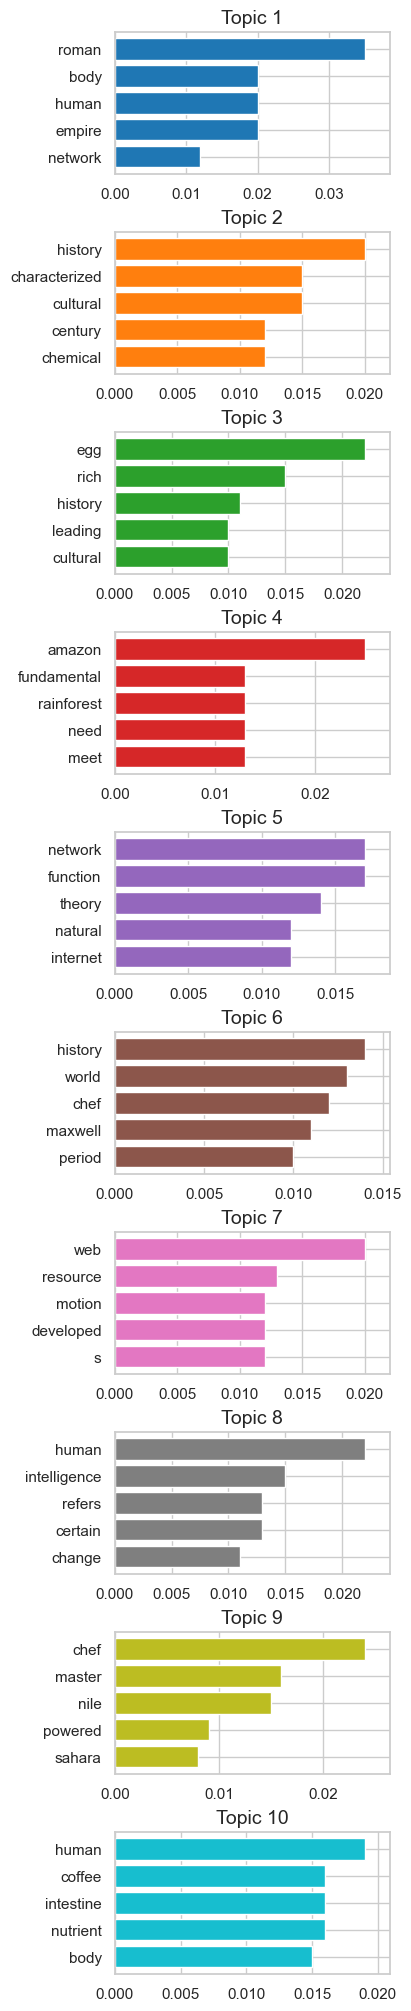

In [45]:
import matplotlib.pyplot as plt

# Provided JSON-like dictionary
data_dict = {
    'topic_0': {'roman': 0.035, 'body': 0.02, 'human': 0.02, 'empire': 0.02, 'network': 0.012, 'tissue': 0.012, 'rich': 0.012, 'diverse': 0.012, 'bc': 0.012, 'history': 0.012},
    'topic_1': {'history': 0.02, 'characterized': 0.015, 'cultural': 0.015, 'century': 0.012, 'chemical': 0.012, 'science': 0.012, 'distributed': 0.011, 'classical': 0.01, 'european': 0.01, 'atomic': 0.01},
    'topic_2': {'egg': 0.022, 'rich': 0.015, 'history': 0.011, 'leading': 0.01, 'cultural': 0.01, 's': 0.008, 'influenced': 0.008, 'oldest': 0.008, 'invariant': 0.008, 'relativity': 0.008},
    'topic_3': {'amazon': 0.025, 'fundamental': 0.013, 'rainforest': 0.013, 'need': 0.013, 'meet': 0.013, 'side': 0.013, 'square': 0.013, 'describes': 0.007, 'sustainability': 0.007, 'atom': 0.007},
    'topic_4': {'network': 0.017, 'function': 0.017, 'theory': 0.014, 'natural': 0.012, 'internet': 0.012, 'time': 0.012, 'selection': 0.012, 'human': 0.012, 'developed': 0.009, 'travel': 0.008},
    'topic_5': {'history': 0.014, 'world': 0.013, 'chef': 0.012, 'maxwell': 0.011, 'period': 0.01, 'planet': 0.009, 'girdle': 0.009, 'reef': 0.009, 'coral': 0.009, 'skeleton': 0.009},
    'topic_6': {'web': 0.02, 'resource': 0.013, 'motion': 0.012, 'developed': 0.012, 's': 0.012, 'theory': 0.012, 'describes': 0.011, 'plate': 0.011, 'culinary': 0.008, 'known': 0.008},
    'topic_7': {'human': 0.022, 'intelligence': 0.015, 'refers': 0.013, 'certain': 0.013, 'change': 0.011, 'energy': 0.011, 'climate': 0.01, 'rich': 0.008, 'like': 0.008, 'beach': 0.008},
    'topic_8': {'chef': 0.024, 'master': 0.016, 'nile': 0.015, 'powered': 0.009, 'sahara': 0.008, 'covering': 0.008, 'title': 0.008, 'largest': 0.008, 'win': 0.008, 'africa': 0.008},
    'topic_9': {'human': 0.019, 'coffee': 0.016, 'intestine': 0.016, 'nutrient': 0.016, 'body': 0.015, 'blood': 0.015, 'anus': 0.009, 'digestive': 0.009, 'stomach': 0.009, 'cut': 0.009}
}

# Extract data in the required format
data = []
for topic, words in data_dict.items():
    sorted_words = sorted(words.items(), key=lambda x: x[1], reverse=True)[:5]
    data.append((int(topic.split('_')[1]), [word for word, _ in sorted_words]))

# Number of topics
num_topics = len(data)

# Create subplots with adjusted title font size and colorful bars
fig, axs = plt.subplots(num_topics, 1, figsize=(4, 2*num_topics), constrained_layout=True)

# Generate colors
colors = plt.cm.tab10(np.linspace(0, 1, num_topics))

# Plot each topic with updated font size for the title and colorful bars
for i, (topic_num, words) in enumerate(data):
    weights = [data_dict[f'topic_{topic_num}'][word] for word in words]
    axs[i].barh(words, weights, color=colors[i % len(colors)])
    axs[i].set_title(f'Topic {topic_num+1}', fontsize=14)
    axs[i].set_xlim(0, max(weights) * 1.1)
    axs[i].invert_yaxis()  # Highest values at the top


plt.show()